IMPORTS, OPTIONS SETTING & DATA READING.

In [79]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
import sys
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.metrics import silhouette_score

if not sys.warnoptions:
    warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)

In [80]:
df= pd.read_csv('marketing_campaign.csv', sep= '\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


DATA PREPROCESSING

In [81]:
print('Duplicates: ', df.duplicated().sum())
print('Null values: ', df.isnull().sum().sum())
print('Shape: ',df.shape)

Duplicates:  0
Null values:  24
Shape:  (2240, 29)


In [82]:
df.dropna(inplace= True)
print('The NULL values have been dropped.')
print('Null values: ', df.isnull().sum().sum())
print('New shape: ', df.shape)

The NULL values have been dropped.
Null values:  0
New shape:  (2216, 29)


In [83]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [84]:
#ID: Unique identifier for each individual in the marketing campaign dataset.
#Year_Birth: The birth year of the individual participating in the campaign, providing demographic information.
#Education: The educational background or level of the individual, which can be a factor in marketing strategies.
#Marital_Status: The marital status of the individual, which may influence their purchasing behavior and campaign response.
#Income: The income level of the individual, impacting their purchasing power and marketing targeting.
#Kidhome: The number of children in the individual's household, affecting family-oriented marketing efforts.
#Teenhome: The number of teenagers in the individual's household, influencing targeted campaigns.
#Dt_Customer: The date the individual became a customer or started interacting with the company for tracking customer journey.
#Recency: The recency of the individual's engagement with the marketing campaign, representing customer activity.
#MntWines: The amount spent by the individual on wines, indicating preferences and potential segmentation.
#MntFruits: The amount spent by the individual on fruits, providing insights into dietary or lifestyle choices.
#MntMeatProducts: The amount spent by the individual on meat products, reflecting dietary preferences.
#MntFishProducts: The amount spent by the individual on fish products, indicating seafood preferences.
#MntSweetProducts: The amount spent by the individual on sweet products, showing taste preferences.
#MntGoldProds: The amount spent by the individual on gold products, reflecting luxury or investment choices.
#NumDealsPurchases: The number of purchases made through deal promotions, highlighting response to discounts.
#NumWebPurchases: The number of purchases made online, indicating digital buying behavior.
#NumCatalogPurchases: The number of purchases made through catalogs, showing response to print materials.
#NumStorePurchases: The number of purchases made in physical stores, indicating offline purchasing behavior.
#NumWebVisitsMonth: The number of visits to the company's website per month, tracking online engagement.
#AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2: Binary indicators for acceptance of different marketing campaigns (e.g., email, social media), showing campaign responsiveness.
#Complain: Binary indicator if the individual has lodged a complaint, reflecting customer satisfaction.
#Z_CostContact: A fixed cost associated with contacting the individual, often used in campaign cost analysis.
#Z_Revenue: A fixed revenue generated from the individual, used for revenue assessment.
#Response: Binary response indicating if the individual responded positively to the marketing campaign, showing campaign success.


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [86]:
for column in df.columns:
    print("Column Name:", column)
    print("Datatype:", df[column].dtype)
    
    if df[column].dtype in ['int64', 'float64']:
        print("Range of Values:", df[column].min(), "to", df[column].max())
    else:
        print("Unique Values:", df[column].unique())
        
    print()


Column Name: ID
Datatype: int64
Range of Values: 0 to 11191

Column Name: Year_Birth
Datatype: int64
Range of Values: 1893 to 1996

Column Name: Education
Datatype: object
Unique Values: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Column Name: Marital_Status
Datatype: object
Unique Values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Column Name: Income
Datatype: float64
Range of Values: 1730.0 to 666666.0

Column Name: Kidhome
Datatype: int64
Range of Values: 0 to 2

Column Name: Teenhome
Datatype: int64
Range of Values: 0 to 2

Column Name: Dt_Customer
Datatype: object
Unique Values: ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '31-05-2013'
 '22-11-2013' '22-05-2014' '11-05-2013' 

FEATURE ENGINEERING

In [87]:
as_it_is= ['Year_Birth', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorrePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
to_drop= ['ID', 'Marital_Status', 'Dt_Customer', 'Recency', 'Z_CostContact', 'Z_Revenue']
to_change= ['Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
outlier_checks= ['Income']

In [88]:
df.drop(columns= to_drop, axis= 1, inplace= True)
print('The required columns have been dropped.')

The required columns have been dropped.


In [89]:
df['Education']= df['Education'].replace({'Graduation':'Graduation',
           'Basic': 'Graduation',
           'Master': 'Postgraduation',
           '2n Cycle': 'Postgraduation',
           'PhD': 'PHD'
           })
df['Education'].value_counts()

Education
Graduation        1170
Postgraduation     565
PHD                481
Name: count, dtype: int64

In [90]:
df['Money Spent']= df['MntWines']+ df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
print('A new column has been made containing all the money spent on goods.')

df.drop(columns= ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis= 1, inplace= True)
print('All the columns describing money spent are dropped.')

A new column has been made containing all the money spent on goods.
All the columns describing money spent are dropped.


OUTLIER DETECTION

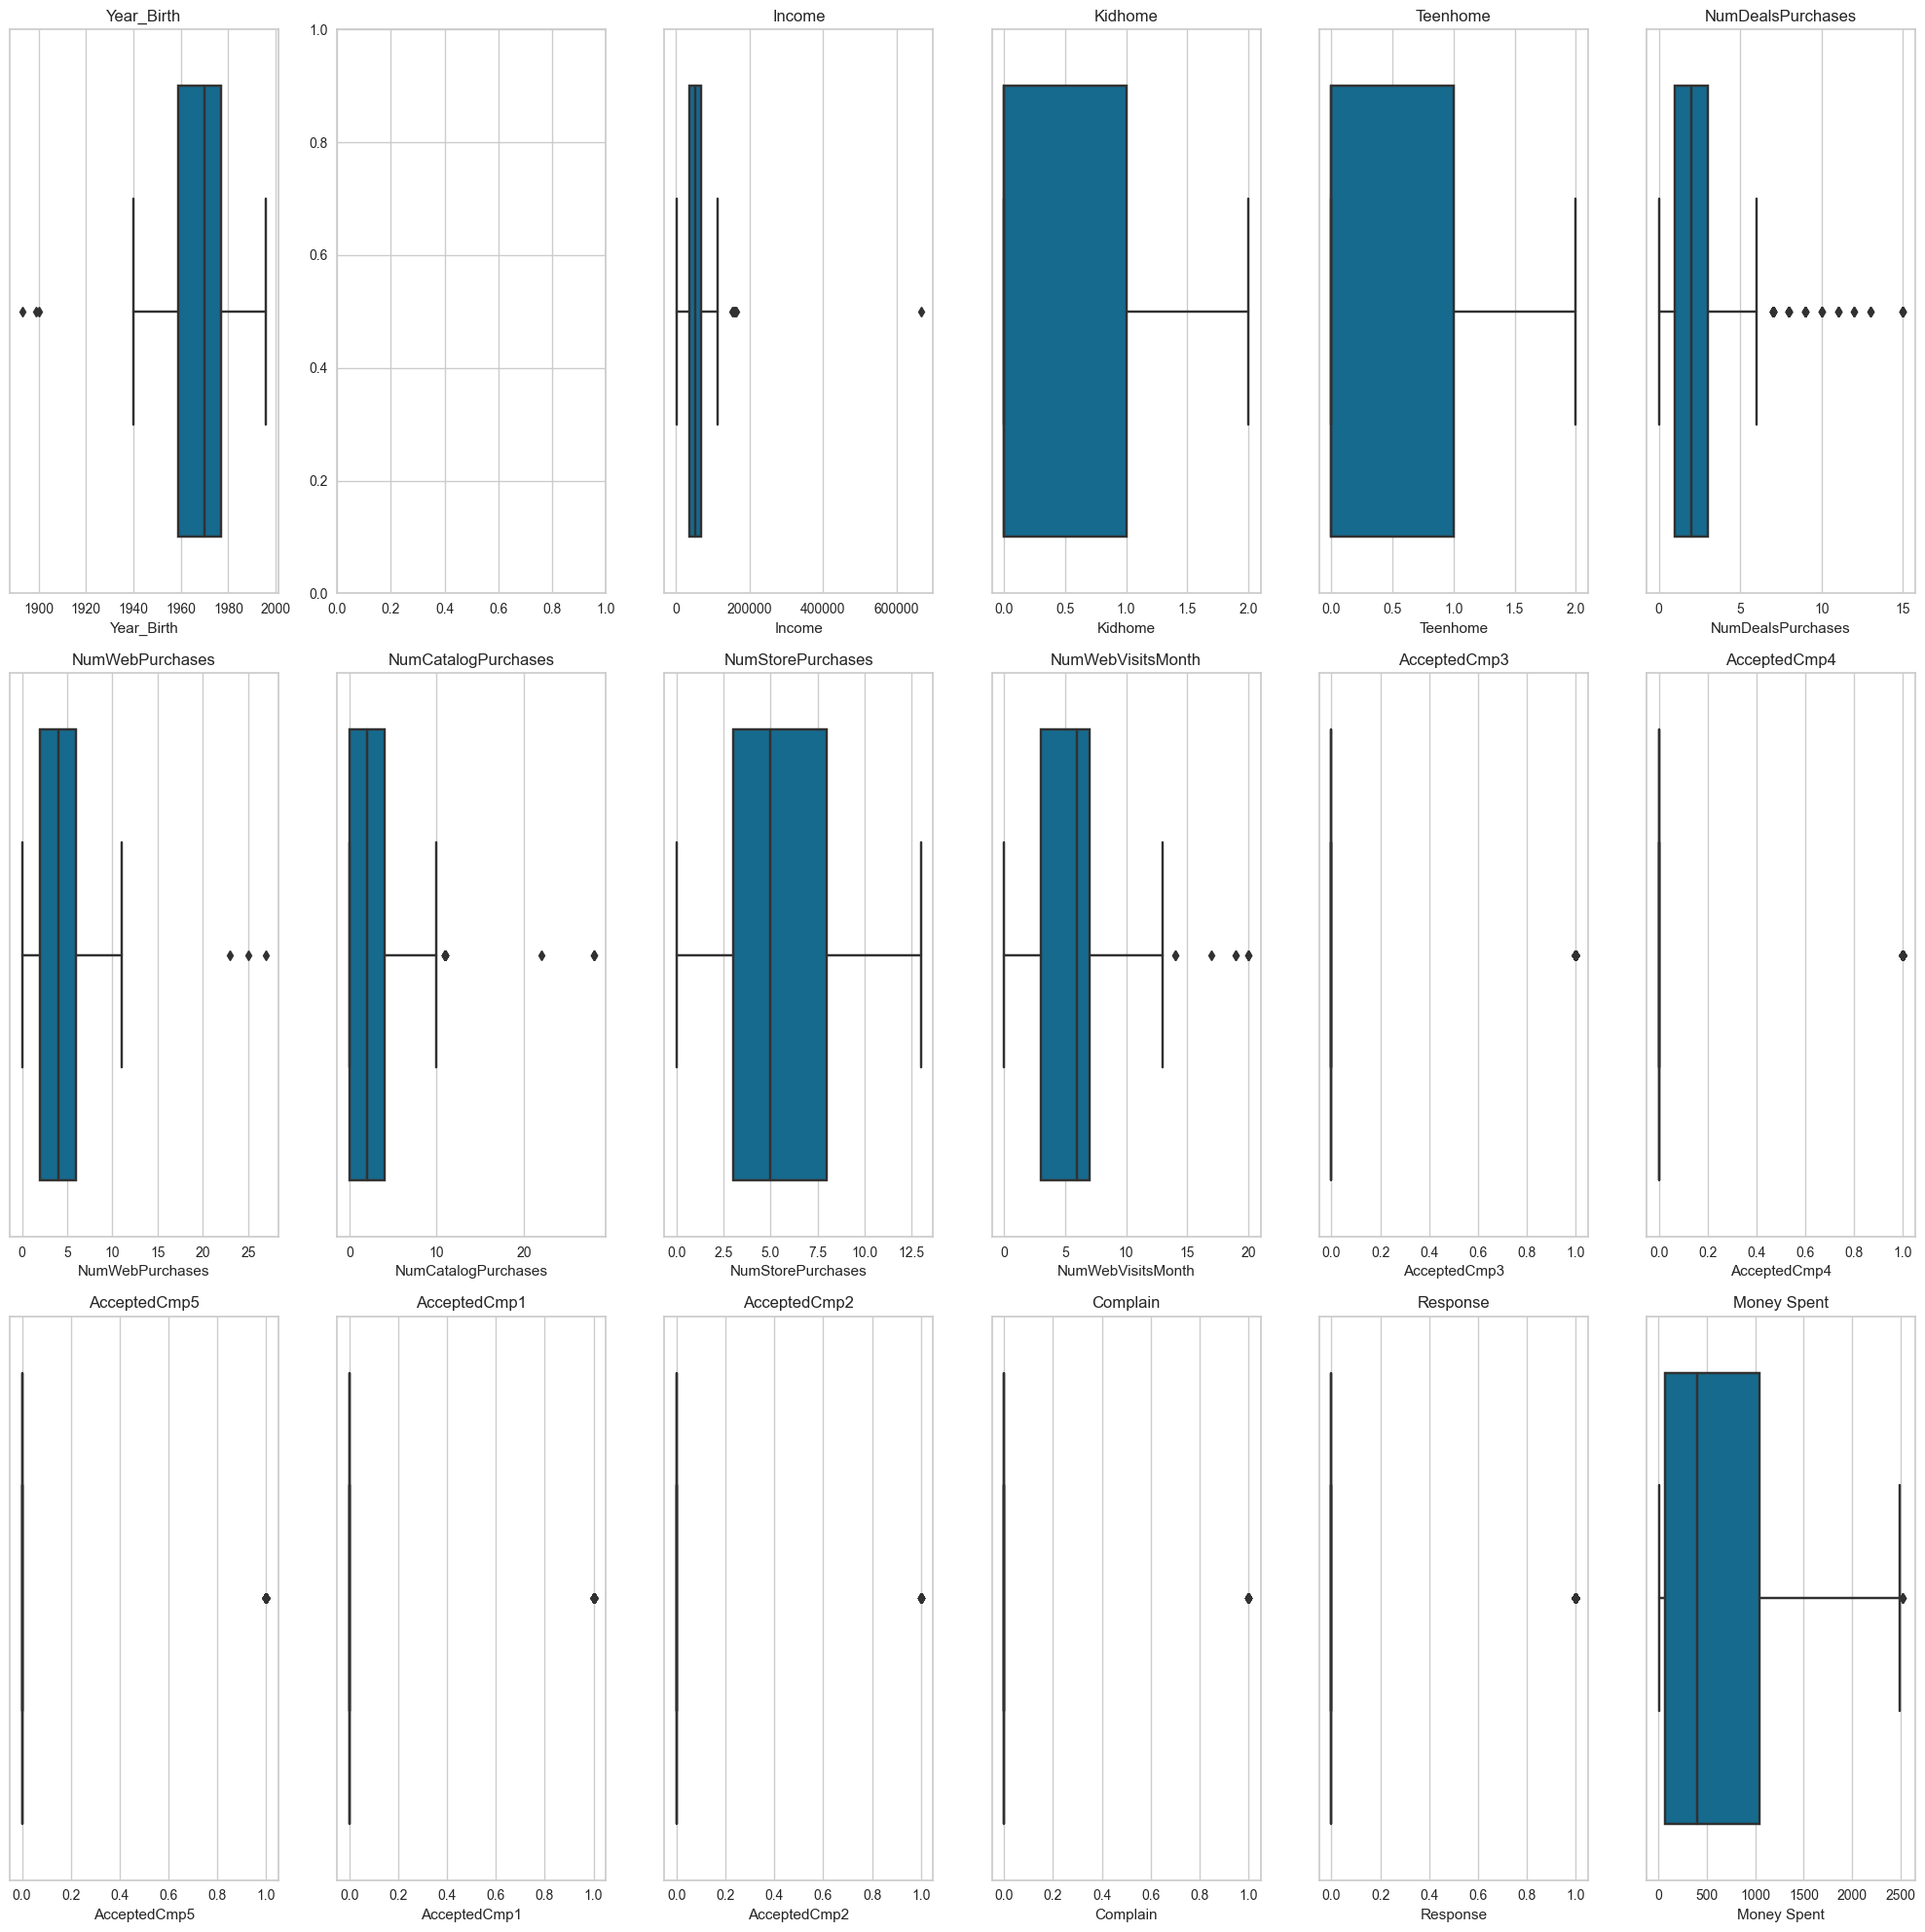

In [91]:
fig, axes = plt.subplots(3, 6, figsize=(20, 20))
flattened_axes = axes.flatten()

for idx, column in enumerate(df.columns):
    if df[column].dtype in ['int64', 'float64']:
        ax = flattened_axes[idx]
        sns.boxplot(x=df[column], ax=ax)
        ax.set_title(column)

plt.tight_layout()
plt.show()


In [92]:
df= df[df['Year_Birth'] > 1940]
df= df[df['Income'] < 200000]

print('Outliers have been removed from the data.')
print('New shape: ', df.shape)

Outliers have been removed from the data.
New shape:  (2211, 18)


LABEL ENCODING

In [93]:
label_encoder= LabelEncoder()

df['Education']= label_encoder.fit_transform(df['Education'])
print(df['Education'].value_counts())

print('All the labels have been encoded.')

Education
0    1169
2     563
1     479
Name: count, dtype: int64
All the labels have been encoded.


DATA VISUALIZATION

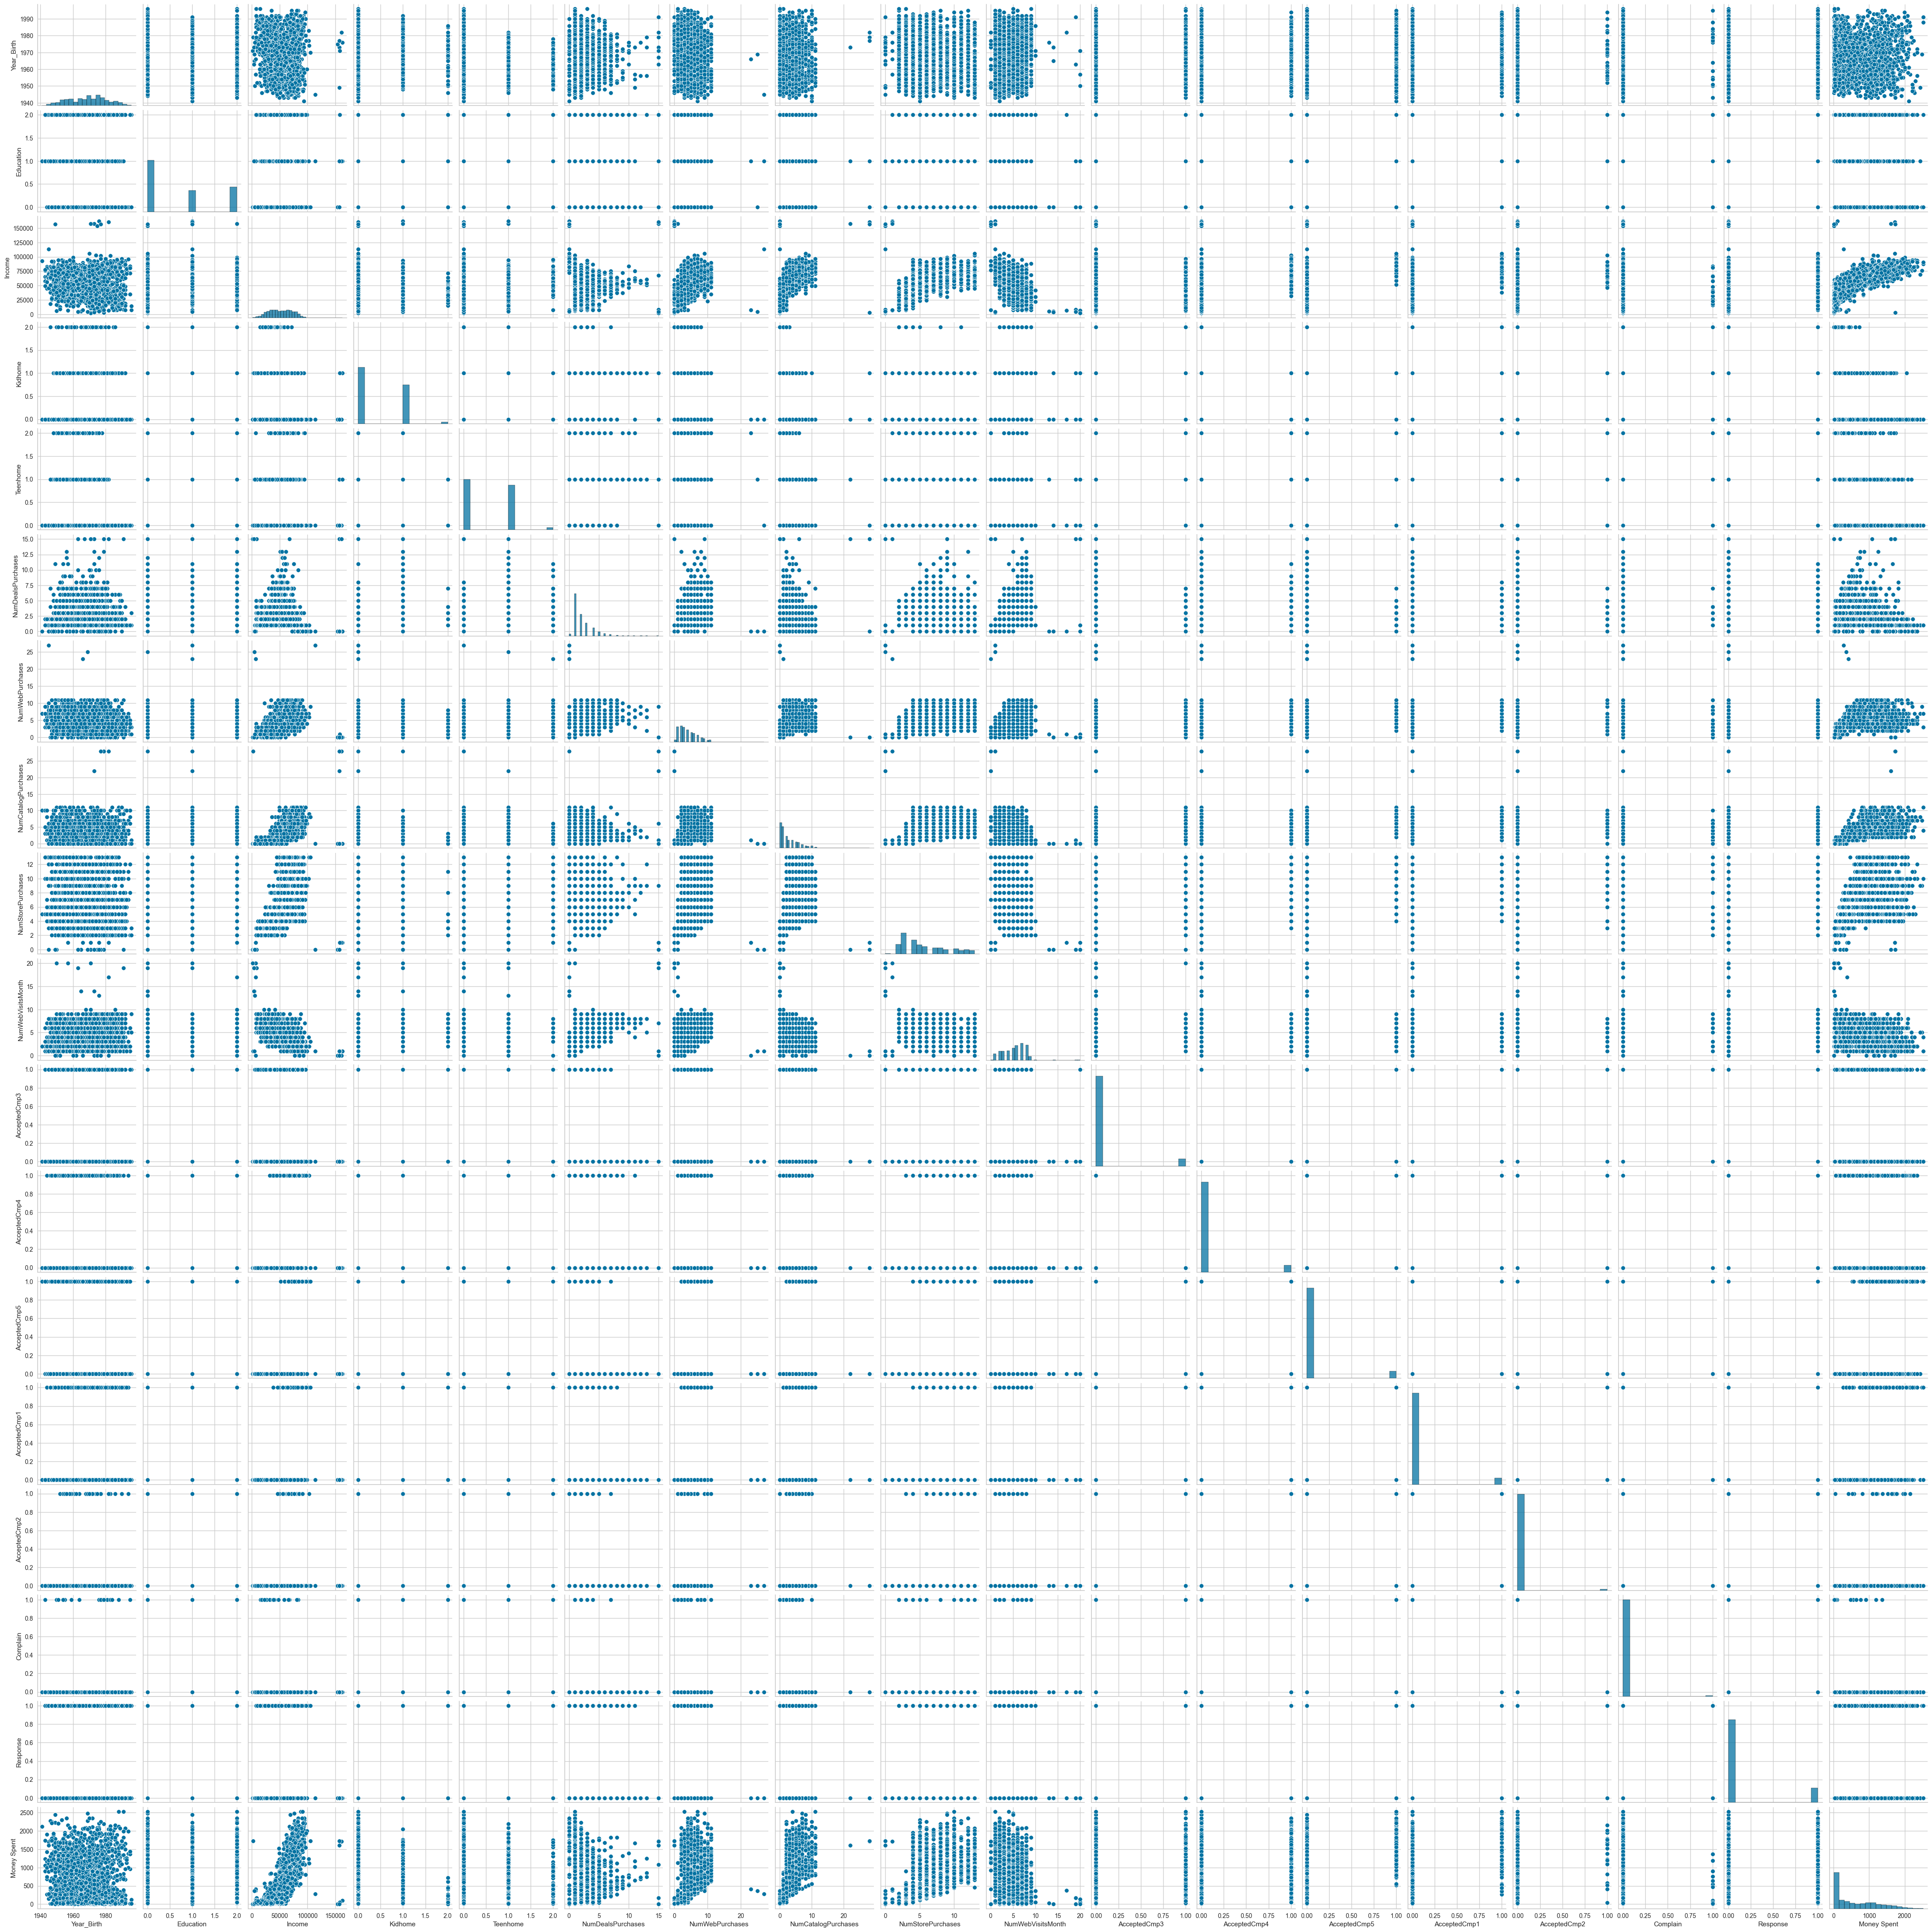

In [94]:
sns.pairplot(df)

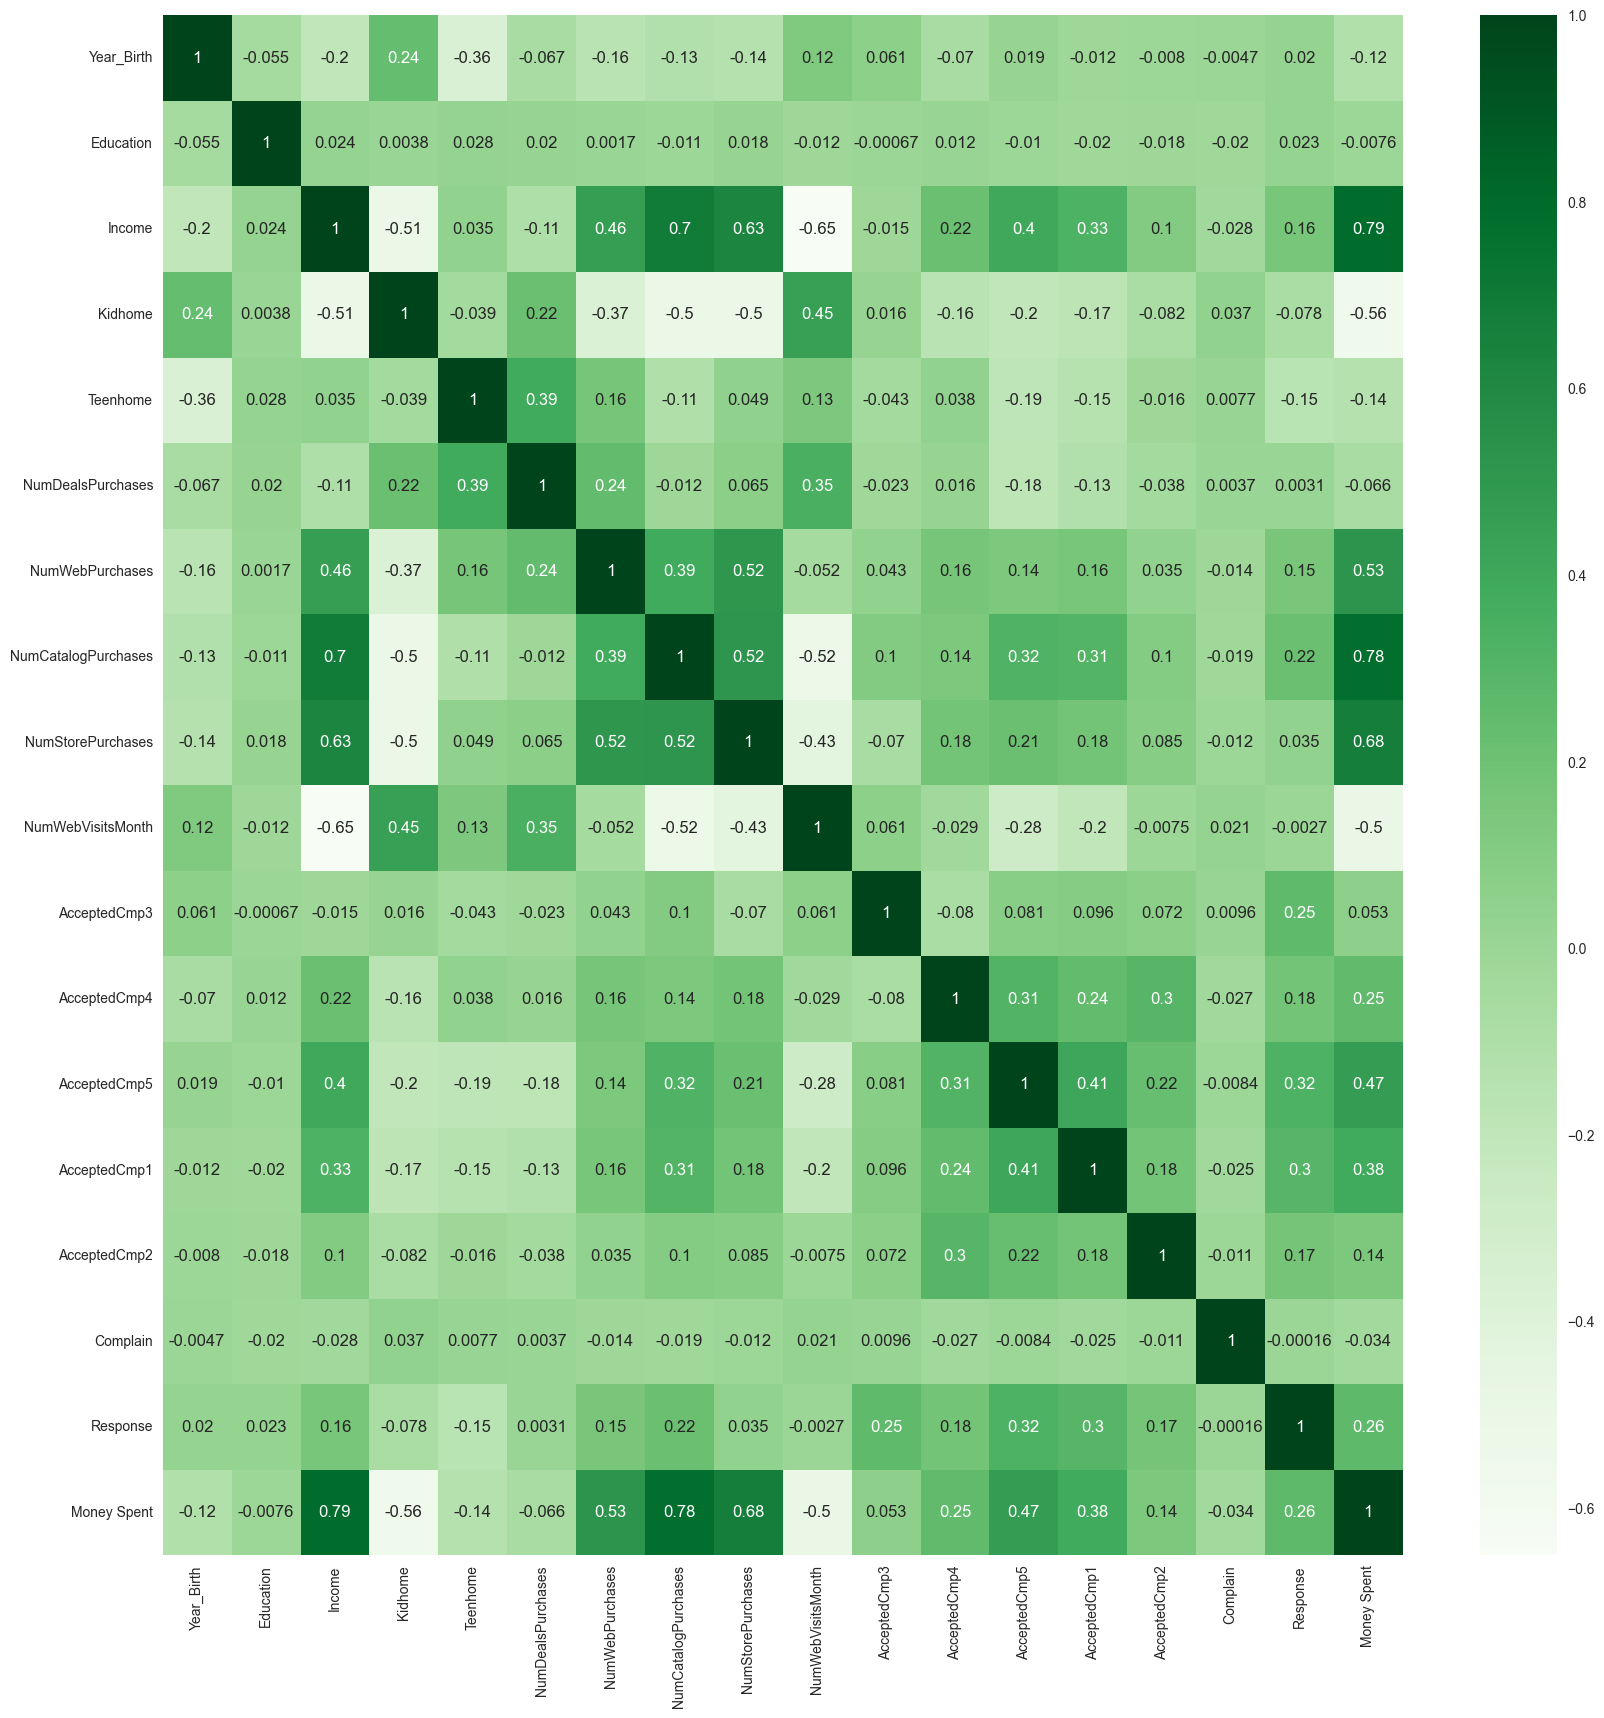

In [95]:
plt.figure(figsize= (20,20))
sns.heatmap(df.corr(), cmap= 'Greens', annot= True)
plt.show()

INFERENTIAL STATISTICS: HYPOTHESIS TESTING

In [96]:
# Chi-Square Test between Response and Education
contingency = pd.crosstab(df['Response'], df['Education'])
chi, p, dof, ex = chi2_contingency(contingency)
print(f"Chi-Square Test between Response and Education:")
print(f'Chi-square= {chi}')
print(f'P-value= {p}')
alpha= 0.05
if p < alpha:
    print("REJECT NULL HYPOTHESIS: There is significant association between Response and Education.")
else:
    print("ACCEPT NULL HYPOTHESIS: There is no significant association between Response and Education.")

Chi-Square Test between Response and Education:
Chi-square= 17.486109227584226
P-value= 0.00015956573104097414
REJECT NULL HYPOTHESIS: There is significant association between Response and Education.


In [97]:
# Chi-Square Test between Response and Complain
contingency= pd.crosstab(df['Response'], df['Complain'])
chi, p, dof, ex = chi2_contingency(contingency)
print(f"Chi-Square Test between Response and Complain:")
print(f'Chi-square= {chi}')
print(f'P-value= {p}')
alpha= 0.05
if p < alpha:
    print("REJECT NULL HYPOTHESIS: There is significant association between Response and Education.")
else:
    print("ACCEPT NULL HYPOTHESIS: There is no significant association between Response and Education.")

Chi-Square Test between Response and Complain:
Chi-square= 0.0
P-value= 1.0
ACCEPT NULL HYPOTHESIS: There is no significant association between Response and Education.


In [98]:
# T-Test between Response and Income
income_response = df[df['Response'] == 1]['Income']
income_no_response = df[df['Response'] == 0]['Income']
t_stat_income, p_val_income = ttest_ind(income_response, income_no_response, equal_var=False)
print(f"T-Test between Response and Income: ")
print(f'T-Stat= {t_stat_income}')
print(f'P-value= {p_val_income})')

if p_val_income < alpha:
    print("REJECT NULL HYPOTHESIS: There is significant difference in Income between those who responded and those who did not.")
else:
    print("ACCEPT NULL HYPOTHESIS: There is no significant difference in Income between those who responded and those who did not.")


T-Test between Response and Income: 
T-Stat= 7.145429682964912
P-value= 3.83282116866749e-12)
REJECT NULL HYPOTHESIS: There is significant difference in Income between those who responded and those who did not.


In [99]:
# T-Test between Response and Money Spent
money_response = df[df['Response'] == 1]['Money Spent']
money_no_response = df[df['Response'] == 0]['Money Spent']
t_stat_money, p_val_money = ttest_ind(money_response, money_no_response, equal_var=False)
print(f"T-Test between Response and Money Spent: ")
print(f'T-Stat= {t_stat_money}')
print(f'P-value= {p_val_money})')

if p_val_money < alpha:
    print("REJECT NULL HYPOTHESIS: There is significant difference in Money spent between those who responded and those who did not.")
else:
    print("ACCEPT NULL HYPOTHESIS: There is no significant difference in Money spent between those who responded and those who did not.")

T-Test between Response and Money Spent: 
T-Stat= 10.744853799660385
P-value= 7.362667528011219e-24)
REJECT NULL HYPOTHESIS: There is significant difference in Money spent between those who responded and those who did not.


DESCRIPTIVE STATISTICS

In [100]:
df.describe()

,Year_Birth,Education,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Money Spent
count,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,1968.926730,0.725916,51959.180461,0.441882,0.506106,2.325192,4.088648,2.672999,5.807327,5.321574,0.073722,0.074175,0.072818,0.064224,0.013569,0.009046,0.150611,607.471732
std,11.688067,0.841757,21532.141688,0.536994,0.544270,1.924736,2.742709,2.927988,3.251447,2.426136,0.261378,0.262114,0.259896,0.245208,0.115717,0.094699,0.357750,602.573512
min,1941.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,1959.000000,0.000000,35221.000000,0.000000,0.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000
50%,1970.000000,0.000000,51373.000000,0.000000,0.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,397.000000
75%,1977.000000,2.000000,68487.000000,1.000000,1.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1048.000000
max,1996.000000,2.000000,162397.000000,2.000000,2.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


SCALING

In [101]:
df_copy= df.copy()
scaler= StandardScaler()
scaler.fit(df_copy)
scaled_df= pd.DataFrame(scaler.transform(df_copy), columns= df.columns)
print('All the features are now scaled.')


All the features are now scaled.


PCA(PRINCIPAL COMPONENT ANALYSIS): DIMENSIONALITY REDUCTION

In [102]:
pca= PCA(n_components= 3)
pca.fit(scaled_df)
PCA_df= pd.DataFrame(pca.transform(scaled_df), columns= (['column1', 'column2', 'column3']))

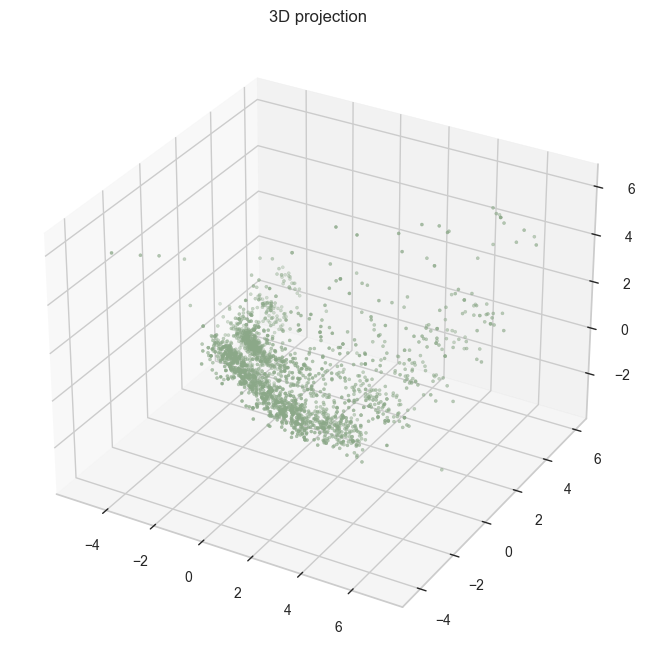

In [103]:
x= PCA_df['column1']
y= PCA_df['column2']
z= PCA_df['column3']

fig= plt.figure(figsize= (12,8))
axes= fig.add_subplot(111, projection= '3d')
axes.scatter(x, y, z, c= '#8ba888', marker= '.')
axes.set_title('3D projection')
plt.show()

ELBOW METHOD: FIND NUMBER OF CLUSTERS

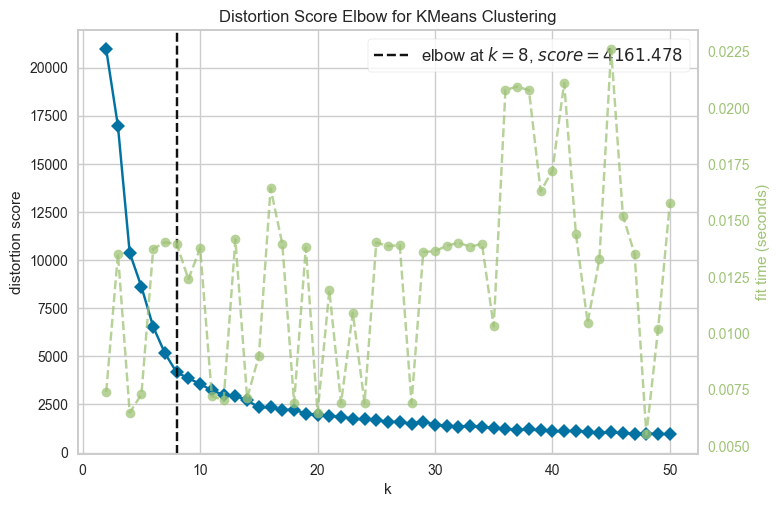

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [111]:
elbow= KElbowVisualizer(KMeans(), k= 50)
elbow.fit(PCA_df)
elbow.show()

CLUSTERING

In [105]:
AC= AgglomerativeClustering(n_clusters= 9)
y_AC= AC.fit_predict(PCA_df)
PCA_df['Clusters']= y_AC
df['Clusters']= y_AC

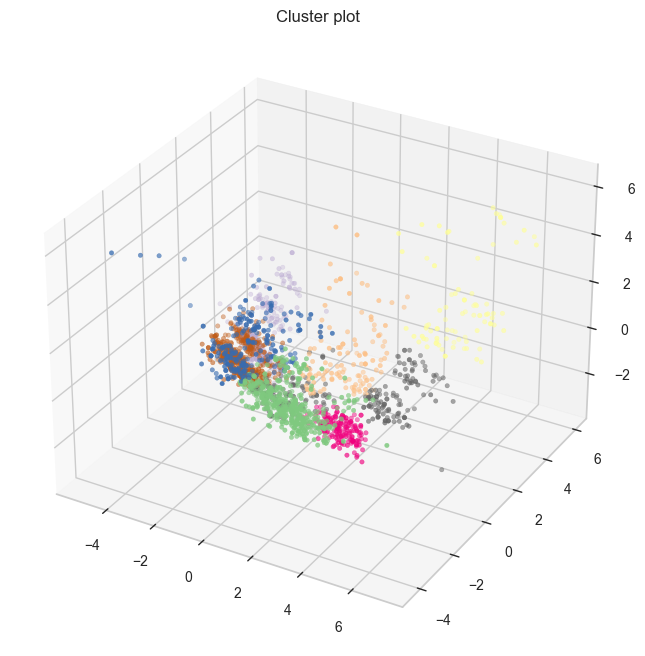

In [106]:
fig= plt.figure(figsize= (12,8))
ax= plt.subplot(111, projection= '3d', label= 'bla')
ax.scatter(x, y, z, s= 40, c= PCA_df['Clusters'], marker= '.', cmap= 'Accent')
ax.set_title('Cluster plot')
plt.show()

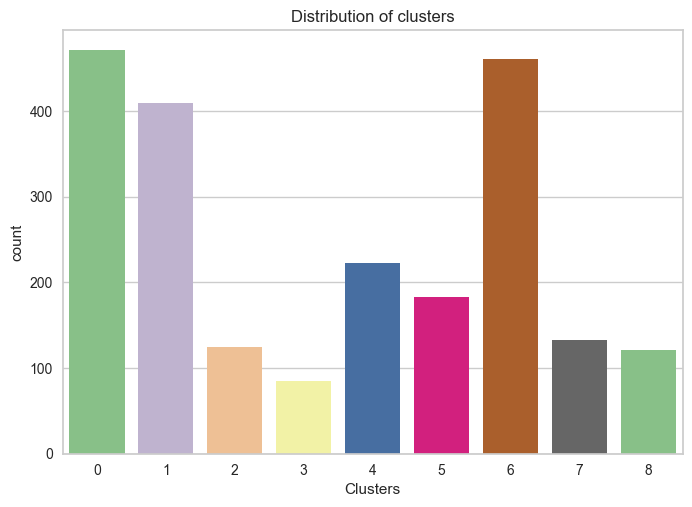

In [107]:
plot= sns.countplot(x= df['Clusters'], palette= 'Accent')
plot.set_title('Distribution of clusters')
plt.show()

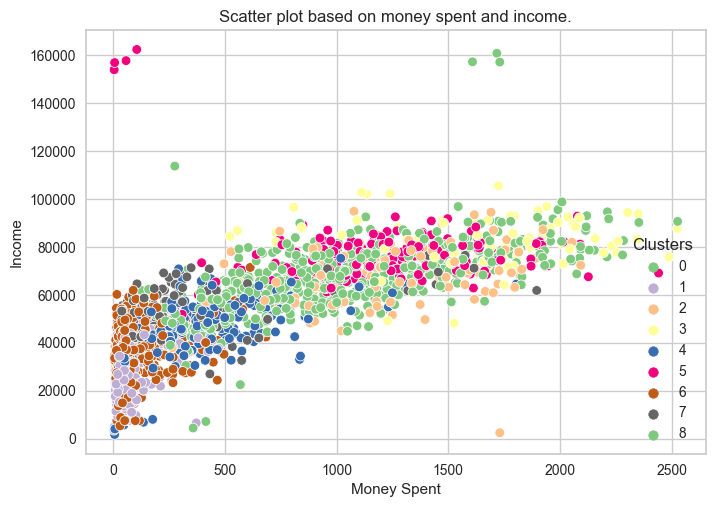

In [108]:
plot= sns.scatterplot(data= df, x= df['Money Spent'], y= df['Income'], hue= df['Clusters'], palette= 'Accent')
plot.set_title('Scatter plot based on money spent and income.')
plt.show()

In [109]:
data= PCA_df
labels= y_AC
silhouette_avg = silhouette_score(data, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.5439340065681224
